Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [ ]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

Describe Data

In [ ]:
data.head()
data.nunique()
data.info()
data.describe()
data.corr()
data=data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<ipython-input-3-dfcf8787d372>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Data Visualization

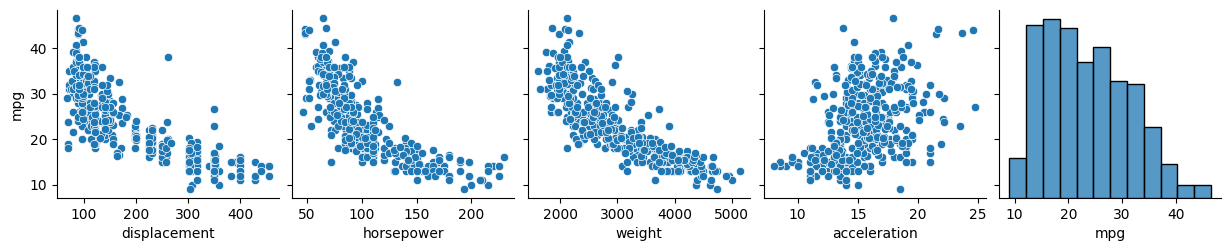

In [ ]:
sns.pairplot(data,x_vars=['displacement', 'horsepower', 'weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

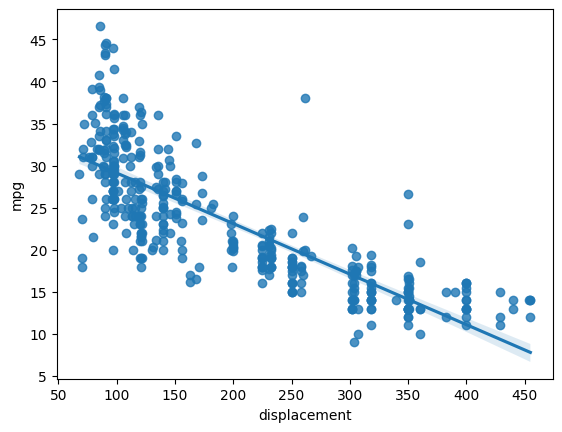

In [ ]:
sns.regplot(x='displacement',y='mpg',data=data)

Define Target Vaiable Y and Feature X

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=data['mpg']
y.shape
x=data[['displacement', 'horsepower', 'weight','acceleration']]
x.shape

(392, 4)

Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x=ss.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


After Standardization Mean is Zero and Standrad Deviation is One

Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

In [ ]:
from sklearn.linear_model import LinearRegression
Ir=LinearRegression()
Ir.fit(x_train, y_train)
LinearRegression()
Ir.intercept_
Ir.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

Mileage = 23.4-1.05 Displacemet 1.68 Horsepower-4.10 Weight 0.115 Acceleration + error

Predict Test Data

In [ ]:
y_pred=Ir.predict(x_test)
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)
mean_absolute_percentage_error(y_test, y_pred)
r2_score (y_test, y_pred)

0.7031250746717691

Polynomial Regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures (degree=2, interaction_only=True, include_bias=False)
x_train2=poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
Ir.fit(x_train2, y_train)
Ir.intercept_
Ir.coef_
y_pred_poly = Ir.predict(x_test2)


Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred_poly)
mean_absolute_percentage_error(y_test, y_pred_poly)
r2_score (y_test, y_pred_poly)

0.7461731314563803